In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trav = pd.read_excel(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Travel\Travel_map.xlsx")

# trav

In [2]:
trav.columns

Index(['Region', 'Region_General', 'Countries', 'Capital_city', 'Latitude',
       'Longitude', 'Diversity', 'Safety', 'Hospitality', 'History', 'Nature',
       'Return'],
      dtype='object')

In [3]:
#select the relevant columns to create map - country & coordinates

trav2 = trav[['Countries', 'Latitude', 'Longitude']]
trav2

,Countries,Latitude,Longitude
0,Azerbaijan,40.4093,49.8671
1,Hungary,47.4979,19.0402
2,Czechia,50.0755,14.4378
3,Switzerland,46.9479,7.4474
4,Iran,35.6892,51.3890
5,UAE,24.4539,54.3773
6,Turkey,41.0082,28.9784
7,Australia,-37.8136,144.9631
8,India,8.5241,76.9366
9,Singapore,1.3521,103.8198


In [4]:
import folium

print(folium.__version__)

0.17.0


# Create map using Folium

**Tile layers/ Map textures**

1) Open street Map - standard

2) Stamen Toner
    - Black and white map style
    - detailed information + clear contrast

3) Stamen Terrain
    - Styled with terrain features
    - it provides good visual for geographical feature

4) Stamen watercolour - artistic look

5)  CartoDB positron - clean and bright map

6) CartoDB Dark Matter - dark-themed map that highlight colored data point

7) Mapbox Bright - bright and vibrant map

8) Mapbox dark - contrastive visual

9) OpentopoMap - emphasizes elevation and terrain


**Basic map**


In [5]:
# #calculate for central location using mean()
# central_lat = trav2['Latitude'].mean()
# central_long = trav2['Longitude'].mean()
# central_location = [central_lat, central_long]

# #create a folium map
# m = folium.Map(location=central_location, zoom_start=2.5)

# cretae folium map with a default location
m = folium.Map(location=[0,0], zoom_start=2)

#add marker for each station
for idx, row in trav2.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Countries'],
        # tooltip='Click me!'
        icon=folium.Icon(icon='star', color='blue')
    ).add_to(m)

#Add tile layers
folium.TileLayer('cartodb positron').add_to(m)

# Find min and max latitude and longitude
min_lat = trav2['Latitude'].min()
max_lat = trav2['Latitude'].max()
min_long = trav2['Longitude'].min()
max_long = trav2['Longitude'].max()

# Adjust the map bounds
bounds = [[min_lat, min_long], [max_lat, max_long]]
m.fit_bounds(bounds)

m

# Folium Map Visualization

- comapred to the previous map example, this map will show more than coordinates. 
- It will show the ratings in regards to diversity, safety perception, hospitality, historical aspect and if I will return

In [17]:
import folium
from folium.plugins import MousePosition
import folium.plugins

# cretae folium map with default location
m2 = folium.Map(location=[0,0], zoom_start=3)

#colour for markers
colors = ['red', 'blue', 'green', 'purple', 'orange']

# add marker for each country
for idx, row in trav.iterrows():
    popup_content = f"""
     <div style="min-width: 250px; max-width: 300px; font-size: 14px;"> 
        <strong>Country:</strong> {row['Countries']}<br>
        <strong>Capital:</strong> {row['Capital_city']}<br>
        <strong>Diversity:</strong> {row['Diversity']}<br>
        <strong>Safety:</strong> {row['Safety']}<br>
        <strong>Hospitality:</strong> {row['Hospitality']}<br>
        <strong>History:</strong> {row['History']}<br>
        <strong>Will I return?:</strong> {row['Return']}<br>
    </div>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_content,
        tooltip='Click me!',
        icon=folium.Icon(icon='star', color=colors[idx % len(colors)])
    ).add_to(m2)

#add tile layers
layer_right=folium.TileLayer('cartodb positron')
layer_left= folium.TileLayer('CartoDB Dark Matter')

sbs = folium.plugins.SideBySideLayers(layer_left, layer_right)

layer_left.add_to(m2)
layer_right.add_to(m2)

sbs.add_to(m2)


# folium.TileLayer('cartodb positron').add_to(m2)
# folium.TileLayer('CartoDB Dark Matter').add_to(m2)

# add mouse position
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' &deg; ';};"

MousePosition(
    position="topright",
    separator=" | ",
    empty_string="NaN",
    lng_first=True,
    num_digits=20,
    prefix="Coordinates:",
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m2)

#find min and max lat and long
min_lat = trav['Latitude'].min()
max_lat = trav['Latitude'].max()
min_long = trav['Longitude'].min()
max_long = trav['Longitude'].max()

#adjust the map bounds
bounds = [[min_lat, min_long], [max_lat, max_long]]
m2.fit_bounds(bounds)

m2

# m2.save("folium_map.html")

# Plotly


In [7]:
#THIS MAP IS SO UGLY!!!

# import plotly.express as px 
# import pandas as pd

# #cretae a scatter mapbox plot
# fig = px.scatter_geo(trav, lat='Latitude', lon='Longitude', text='Countries',title='Geographic Data Visualization')

# fig.update_layout(mapbox_style="open-street-map", 
# width=700,
# height=700)

# fig.show()

# Geopandas

- install geopandas
- Activate environment: conda active base
- install geopandas: conda install -c conda-forge geopandas
- reload window

C:\Users\ASYIKIN\AppData\Local\Temp\ipykernel_11984\1448688262.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


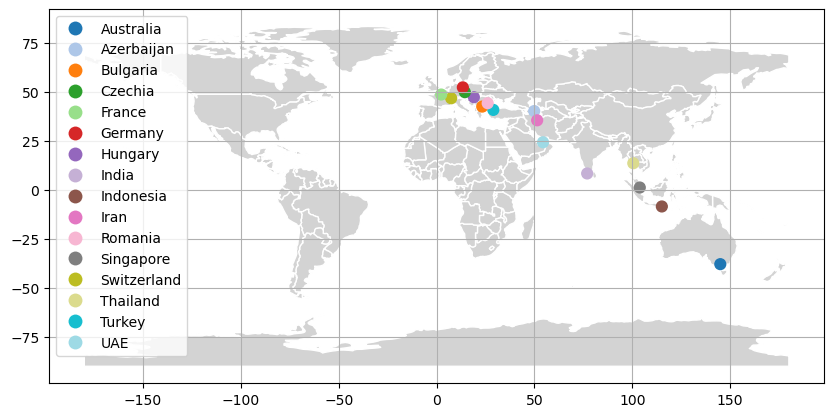

In [8]:
import geopandas as gpd

#convert to geodataframe
gdf = gpd.GeoDataFrame(trav, geometry=gpd.points_from_xy(trav.Longitude, trav.Latitude))

#plot world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10,8), facecolor='lightgray', edgecolor='White')

#plot points with customizations
gdf.plot(ax=ax, column='Countries', cmap='tab20', legend=True, markersize=60)

#add gridlines
ax.grid(True)

plt.show()

In [9]:
print(trav2.columns)
print(trav.columns)

Index(['Countries', 'Latitude', 'Longitude'], dtype='object')
Index(['Region', 'Region_General', 'Countries', 'Capital_city', 'Latitude',
       'Longitude', 'Diversity', 'Safety', 'Hospitality', 'History', 'Nature',
       'Return'],
      dtype='object')


# PLOTLY

In [10]:
import plotly.express as px
import pandas as pd

#calculate bounds
min_lat = trav['Latitude'].min()
max_lat = trav['Latitude'].max()
min_long = trav['Longitude'].min()
max_long = trav['Longitude'].max()

#calculate the center of the map
center_lat = (min_lat + max_lat)/2
center_lon = (min_long + max_long)/2

fig = px.scatter_mapbox(trav,
lon='Longitude',
lat='Latitude', 
zoom=1,
color='Countries',
height=400,
title="Countries I've visited",
hover_data=['Diversity','Safety', 'Hospitality', 'History', 'Return']
)

#update marker size
fig.update_traces(marker=dict(size=15))
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})


#fit the map to the data points
fig.update_layout(mapbox_center={"lat": center_lat, "lon": center_lon})

fig.show()

In [11]:
# bar charts
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# sort dataframe 
sorted_safety = trav.sort_values(by='Safety')
sorted_hospitality= trav.sort_values(by='Hospitality')
sorted_history= trav.sort_values(by='History')
sorted_nature = trav.sort_values(by='Nature')

#create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Safety", "Hospitality", "History", "Nature"),
    horizontal_spacing=0.1, vertical_spacing=0.1
)

# add bar charts to each subplot
fig.add_trace(
    go.Bar(y=sorted_safety['Countries'], x=sorted_safety['Safety'], name='Safety', orientation='h'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(y=sorted_hospitality['Countries'], x=sorted_hospitality['Hospitality'], name='Hospitality', orientation='h'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(y=sorted_history['Countries'], x=sorted_history['History'], name='History', orientation='h'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(y=sorted_nature['Countries'], x=sorted_nature['Nature'], name='Nature', orientation='h'),
    row=2, col=2
)

#update layout
fig.update_layout(
    title_text='Ratings by Country (1 - 5)',
    showlegend=False,
    height=800,
    width=1000,
    title_x=0.5
)

fig.show()


In [12]:
trav

,Region,Region_General,Countries,Capital_city,Latitude,Longitude,Diversity,Safety,Hospitality,History,Nature,Return
0,Caucasia,Europe,Azerbaijan,Baku,40.4093,49.8671,Low,4,3,2,4,Yes
1,Central Europe,Europe,Hungary,Budapest,47.4979,19.0402,Low,4,3,3,4,Indifferent
2,Central Europe,Europe,Czechia,Prague,50.0755,14.4378,Low,3,1,3,3,No
3,Central Europe,Europe,Switzerland,Bern,46.9479,7.4474,Low,4,4,2,5,Yes
4,Middle East,Middle East,Iran,Tehran,35.6892,51.3890,Low,4,5,5,5,Yes
5,Middle East,Middle East,UAE,Dubai,24.4539,54.3773,Medium,4,2,1,1,No
6,Middle East,Middle East,Turkey,Istabul,41.0082,28.9784,Low,4,5,5,4,Yes
7,Oceania,Europe,Australia,Melbourne,-37.8136,144.9631,High,4,3,2,5,Yes
8,South Asia,Asia,India,Kerala,8.5241,76.9366,Low,2,3,1,3,Indifferent
9,Southeast Asia,Asia,Singapore,Singapore,1.3521,103.8198,Medium,4,2,1,3,Indifferent


In [13]:
trav.columns

Index(['Region', 'Region_General', 'Countries', 'Capital_city', 'Latitude',
       'Longitude', 'Diversity', 'Safety', 'Hospitality', 'History', 'Nature',
       'Return'],
      dtype='object')

In [86]:
import numpy as np 

#melt the data 
trav_melted = trav.melt(
    id_vars=['Countries'],
    value_vars=['Safety', 'Hospitality', 'History', 'Nature'],
    var_name='Rating Type',
    value_name='Rating Value'
)

# Add jitter to the Rating Value to reduce overlap
jitter_strength = 0.1  # Adjust this value for more or less jitter
trav_melted['Rating Value'] += np.random.uniform(-jitter_strength, jitter_strength, size=trav_melted.shape[0])

#cretae a size mapping based on rating values
size_scale = trav_melted['Rating Value'] * 20

color_map = {
    'Safety': 'blue',
    'Hospitality': 'yellow',
    'History': 'red',
    'Nature': 'fuchsia'
}

fig = px.scatter(
    trav_melted,
    x='Countries',
    y='Rating Value',
    color='Rating Type',
    size=size_scale,
    opacity=0.7,
    color_discrete_map= color_map,
    labels={'Rating Value': 'Rating Values', 'Countries': 'Countries'}
)

fig.update_layout(
    title={
        'text': 'Country Ratings',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font={
        'size': 25,  
        'family': 'Arial'
    }, 
     legend=dict(
        x=0.5,  # Position to the right of the chart
        y= 1.15,   # Center vertically
        xanchor='center',  # Anchor to the left side of the legend
        yanchor='top',  # Anchor to the middle of the legend
        orientation= 'h',
        title='Legend' # Optional: Title for the legend
    ),
    template='plotly_dark',
    margin=dict(l=20, r=20, t=80, b=20)
)

fig.write_html("country_ratings_overview.html")

fig.show()

In [68]:
import numpy as np 

#melt the data 
trav_melted = trav.melt(
    id_vars=['Region_General', 'Countries'],
    value_vars=['Safety', 'Hospitality', 'History', 'Nature'],
    var_name='Rating Type',
    value_name='Rating Value'
)

fig = px.bar (
    trav_melted, 
    x='Rating Value',
    y='Countries', 
    color='Rating Type',
    facet_col ='Region_General',
    title='Country Ratings by Region',
    orientation='h',
    text='Rating Value'
)

fig.update_layout(
    legend=dict(
        x=1.02,  # Position to the right of the chart
        y=0.5,   # Center vertically
        xanchor='left',  # Anchor to the left side of the legend
        yanchor='middle',  # Anchor to the middle of the legend
        title='Legend',  # Optional: Title for the legend
        bordercolor='Black',
        borderwidth=0.5,
    ),
    title={
        'text': 'Country Ratings by Region',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'y': 0.95
    },
    title_font={
        'size': 20,
        # 'color': 'blue',
        'family': 'Arial'   
    },
    height=450,
    width=1000
)

# fig.write_html("ratings_region.html")

fig.show()